# API로 수집한 데이터 로드

NEXON Open API 지원으로 인해 과거의 데이터를 수집할 수 있었음을 밝힙니다.\
2024년 2월 1일(1월 31일 집계)을 기준으로 한 달 간격으로 데이터(25년 2월 1일까지)를 수집함.

본 데이터는 에오스, 헬리오스(구 리부트)월드를 제외한 월드의 데이터이다.

In [1]:
import pandas as pd

In [2]:
chunk_size = 1000000

In [3]:
def file_road(year, month):
    Data = []
    for i, chunk in enumerate(pd.read_csv(f'메이플 레벨/{year}년 {month}월.csv', chunksize=chunk_size, sep=',', encoding='cp949')):
        Data.append(chunk)

    return pd.concat(Data, ignore_index=True) if Data else pd.DataFrame()

In [4]:
Data_24_02 = file_road(24, 2)
Data_24_03 = file_road(24, 3)
Data_24_04 = file_road(24, 4)
Data_24_05 = file_road(24, 5)
Data_24_06 = file_road(24, 6)
Data_24_07 = file_road(24, 7)
Data_24_08 = file_road(24, 8)
Data_24_09 = file_road(24, 9)
Data_24_10 = file_road(24, 10)
Data_24_11 = file_road(24, 11)
Data_24_12 = file_road(24, 12)
Data_25_01 = file_road(25, 1)
Data_25_02 = file_road(25, 2)

# 1년간 전체 유저(리부트 제외)의 레벨링 분석

2024년 2월 1일(1월 31일 집계)기준 260레벨 이상 캐릭터 수는 약 70만 개의 캐릭터가 등록되어 있다.

In [5]:
Data_24_02

,월드,랭킹,닉네임,레벨
0,루나,1,'오지환',296
1,스카니아,2,'단솜',295
2,크로아,3,'솝상',295
3,루나,4,'승준',295
4,스카니아,5,'비올레타개빡',294
...,...,...,...,...
707027,스카니아,707028,'떼함',260
707028,엘리시움,707029,'루가연',260
707029,스카니아,707030,'메가버닝',260
707030,크로아,707031,'HB해머SH',260


2025년 2월 1일(1월 31일 집계)기준 260레벨 이상 캐릭터 수는 약 166만 개의 캐릭터가 등록되어 있다..

In [6]:
Data_25_02

,월드,랭킹,닉네임,레벨
0,루나,1,'오지환',300
1,엘리시움,2,'버터',299
2,이노시스,3,'테룽이',299
3,크로아,4,'솝상',298
4,제니스,5,'보마노랑이',298
...,...,...,...,...
1661029,제니스,1661017,'아댈히',260
1661030,루나,1661017,'로리',260
1661031,제니스,1661017,'아댈잇',260
1661032,크로아,1661017,'쇼비nism',260


In [7]:
len(Data_25_02) - len(Data_24_02)

954002

1년 동안 707,032개에서 954,002개가 늘어 1,661,034개가 되었다.

1년 간의 260레벨 이상 캐릭터의 현황을 5레벨 단위로 끊었을 때 다음과 같다.

In [8]:
total = pd.DataFrame(columns=['260', '265', '270', '275', '280', '285', '290', '295'])

In [9]:
def level_classification(DF):
    Temp = []
    for i in range(8):
        Temp.append(len(DF[DF['레벨']>=(260 + (i*5))]))

    Temp = pd.DataFrame([Temp], columns=['260', '265', '270', '275', '280', '285', '290', '295'])
    return Temp

In [10]:
List = [Data_24_02, Data_24_03, Data_24_04, Data_24_05, Data_24_06, Data_24_07,
        Data_24_08, Data_24_09, Data_24_10, Data_24_11, Data_24_12, Data_25_01, Data_25_02]

total = pd.concat([level_classification(df) for df in List], ignore_index=True)

In [11]:
total

,260,265,270,275,280,285,290,295
0,707032,297211,202209,121073,52484,11330,454,4
1,777757,320576,218829,133509,60373,13781,642,8
2,830466,345880,241452,148125,70181,16994,886,9
3,829266,353341,249356,156240,76747,19586,1146,10
4,839989,362388,258467,165641,84599,23326,1556,11
5,870593,378096,272151,176561,93280,27988,2094,18
6,1011006,395277,282433,184042,99775,31929,2801,24
7,1116948,421942,301395,195390,106566,36328,3858,33
8,1195364,445224,316230,206269,113197,40635,5305,46
9,1253733,474038,337049,218881,120855,45247,6578,76


In [12]:
T_260 = [0]
T_265 = [0]
T_270 = [0]
T_275 = [0]
T_280 = [0]
T_285 = [0]
T_290 = [0]
T_295 = [0]

In [13]:
for i in range(12):
    T_260.append(total['260'][i+1]-total['260'][i])
    T_265.append(total['265'][i+1]-total['265'][i])
    T_270.append(total['270'][i+1]-total['270'][i])
    T_275.append(total['275'][i+1]-total['275'][i])
    T_280.append(total['280'][i+1]-total['280'][i])
    T_285.append(total['285'][i+1]-total['285'][i])
    T_290.append(total['290'][i+1]-total['290'][i])
    T_295.append(total['295'][i+1]-total['295'][i])
    
total['260_inc'] = T_260
total['265_inc'] = T_265
total['270_inc'] = T_270
total['275_inc'] = T_275
total['280_inc'] = T_280
total['285_inc'] = T_285
total['290_inc'] = T_290
total['295_inc'] = T_295

이 데이터를 그래프로 살펴보면 다음과 같다.

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
rc('font', family='Malgun Gothic')

(-50000.0, 300000.0)

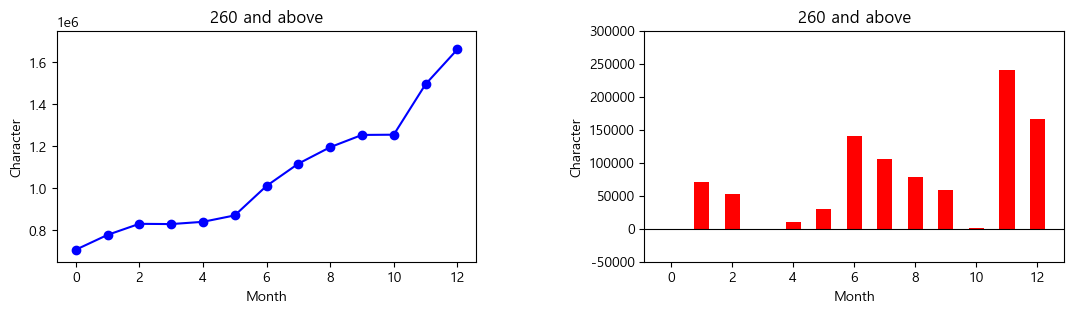

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3), gridspec_kw={'wspace': 0.4})

# 260이상 캐릭터 수
axes[0].plot(total.index, total['260'], marker='o', linestyle='-', label='Count', color='blue')
axes[0].set_title('260 and above')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Character')
axes[0].set_ylim(650000, 1750000)

# 260이상 캐릭터 증감
axes[1].bar(total.index, total['260_inc'], color=['blue' if value < 0 else 'red' for value in total['260_inc']], width=0.5)
axes[1].set_title('260 and above')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Character')
axes[1].axhline(0, color='black', linewidth=0.8)
axes[1].set_ylim(-50000, 300000)

260레벨 이상 캐릭터의 수가 줄어드는 구간, 3개월 뒤인 5월 1일 데이터가 있다.\
이 구간은 버닝월드에서 키워놓았던 캐릭터가 삭제되었거나 하는 등의 이유로 줄어들었을 것으로 추정된다.(약 -1200의 수치를 보임)

260레벨까지 적용되는 하이퍼 버닝은 2023년 여름방학 시즌에 처음 적용되었다.\
2024년 2월은 하이퍼 버닝으로 260까지 키운 유저가 많은 시점이므로 큰 상승폭을 보이진 않지만, 꾸준한 캐릭터의 육성이 집계된다.

6개월 뒤인 8월 1일 데이터(7월 집계)의 경우, 여름방학 이벤트로 다시 하이퍼 버닝이 주어지면서 4달 간의 큰 육성 폭을 보인다.\
11개월 뒤인 1월 1일 데이터(24년 12월 집계)의 경우 하이퍼 버닝이 출시되었고,\
1+4 이벤트로 육성 난이도가 더 낮아지며 이전보다 큰 폭으로 260레벨 이상의 캐릭터 수가 증가했음을 알 수 있다.

(0.0, 150000.0)

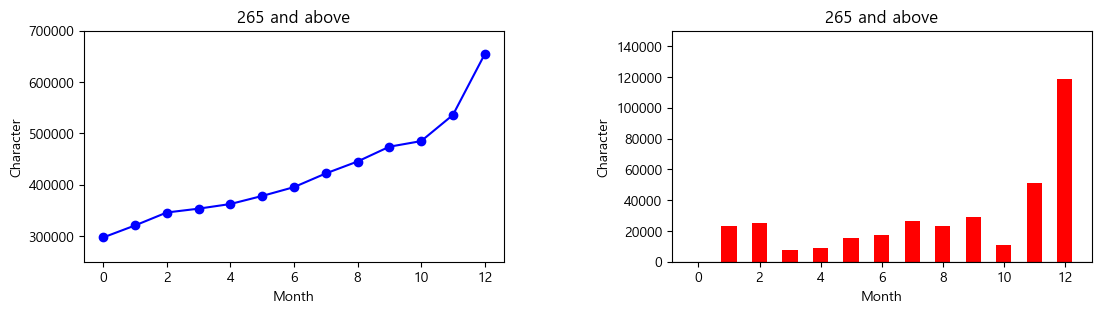

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3), gridspec_kw={'wspace': 0.4})

# 265이상 캐릭터 수
axes[0].plot(total.index, total['265'], marker='o', linestyle='-', label='Count', color='blue')
axes[0].set_title('265 and above')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Character')
axes[0].set_ylim(250000, 700000)

# 265이상 캐릭터 증감
axes[1].bar(total.index, total['265_inc'], color=['blue' if value < 0 else 'red' for value in total['265_inc']], width=0.5)
axes[1].set_title('265 and above')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Character')
axes[1].axhline(0, color='black', linewidth=0.8)
axes[1].set_ylim(0, 150000)

레벨이 260을 달성하게 되면 레벨업 이벤트를 완료하여 더 이상의 추가 보상을 받을 수 없다.\
그런 이유로 260레벨과는 다르게 크게 24년 여름에서 크게 증가폭을 보이지 않는다.

그러나 24년 겨울 이벤트에서 챌린져스 월드와 함께 챌린져스 이벤트를 진행하면서 유저들은 260을 넘어서 키워야 할 동기를 부여받는다.\
또한 익스트림 몬스터파크, 에픽 던전등의 주간 컨텐츠를 1개의 캐릭터만 진행할 수 있었던 것에서 최대 2개의 캐릭터가 이용이 가능해지면서\
부캐릭터의 성장가속을 진행할 수 있게 되었으며 그 결과 265이상 캐릭터의 증감폭이 24년 겨울에 이례적으로 증가하게 된다.

(0.0, 70000.0)

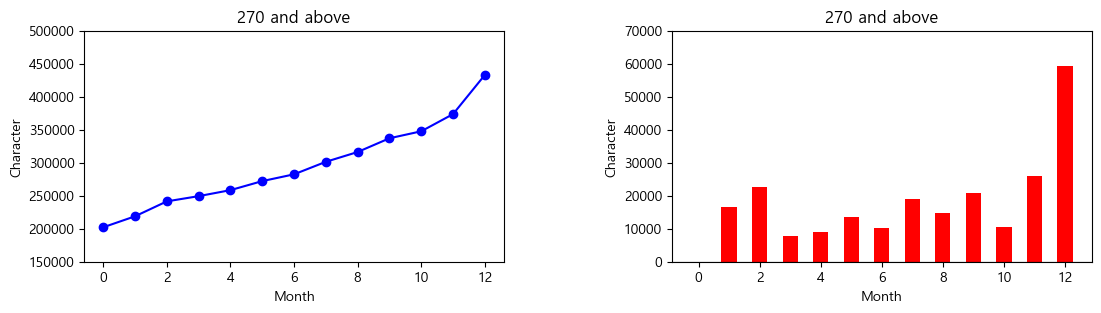

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3), gridspec_kw={'wspace': 0.4})

# 270이상 캐릭터 수
axes[0].plot(total.index, total['270'], marker='o', linestyle='-', label='Count', color='blue')
axes[0].set_title('270 and above')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Character')
axes[0].set_ylim(150000, 500000)

# 270이상 캐릭터 증감
axes[1].bar(total.index, total['270_inc'], color=['blue' if value < 0 else 'red' for value in total['270_inc']], width=0.5)
axes[1].set_title('270 and above')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Character')
axes[1].axhline(0, color='black', linewidth=0.8)
axes[1].set_ylim(0, 70000)

270레벨도 마찬가지로 챌린저스 월드와 이벤트 출시의 영향을 많이 받은 것으로 보인다.\
다만 270레벨까지의 성장난이도는 265레벨까지의 성장난이도보다 훨씬 크기 때문에 270달성 유저는 265달성 유저의 절반 수준에 그쳤다.

(0.0, 20000.0)

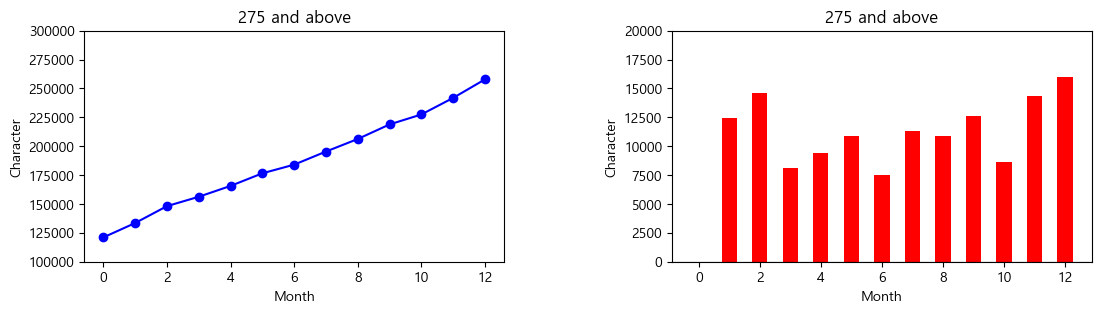

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3), gridspec_kw={'wspace': 0.4})

# 270이상 캐릭터 수
axes[0].plot(total.index, total['275'], marker='o', linestyle='-', label='Count', color='blue')
axes[0].set_title('275 and above')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Character')
axes[0].set_ylim(100000, 300000)

# 270이상 캐릭터 증감
axes[1].bar(total.index, total['275_inc'], color=['blue' if value < 0 else 'red' for value in total['275_inc']], width=0.5)
axes[1].set_title('275 and above')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Character')
axes[1].axhline(0, color='black', linewidth=0.8)
axes[1].set_ylim(0, 20000)

275달성 유저의 경우는 하이퍼 버닝과 챌린저스 월드와 같은 이벤트에는 크게 영향을 주지 않는 것으로 판단할 수 있다.\
270까지 캐릭터를 성장시키는 데 성공한 유저들이 275부터는 그렇지 않음을 보이는데,\
이는 270레벨까지 사용 가능한 '초월 성장의 비약'이 270레벨까지 캐릭터를 성장시키는 윤활유 역할을 한 것으로 보인다.

또한 275레벨 달성 유저의 그래프를 살펴보면 평균에서 크게 벗어나지 않는 수치로 일정하게 늘어나는 것으로 보인다.\
게임에 적응하여 녹아든 유저와 부캐릭터를 성장시키는 기존 유저들이 게임을 꾸준하게 이용하고 있다는 지표로써,\
매월 1만 명 이상 수준의 신규 유저 혹은 기존 유저가 새로이 캐릭터를 성장시키고 있음을 알 수 있다.

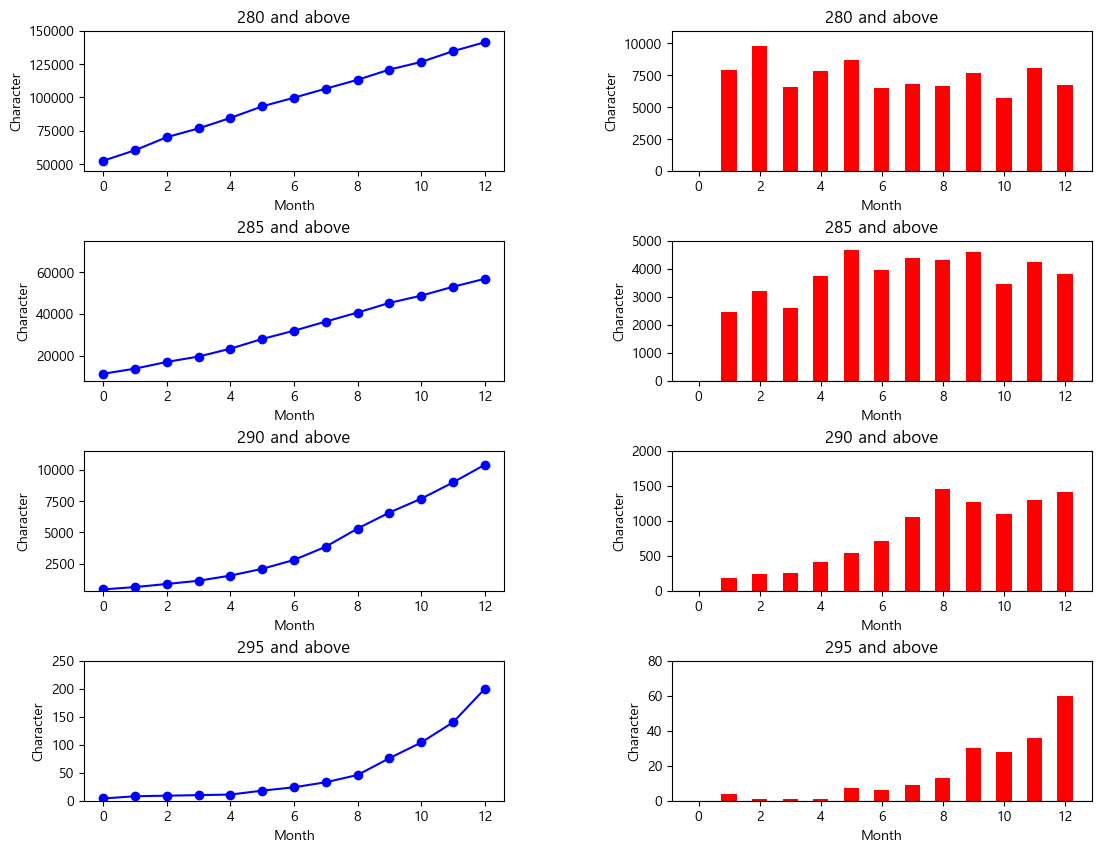

In [19]:
fig, axes = plt.subplots(4, 2, figsize=(12, 10), gridspec_kw={'wspace': 0.4})

# 280이상 캐릭터 수
axes[0, 0].plot(total.index, total['280'], marker='o', linestyle='-', label='Count', color='blue')
axes[0, 0].set_title('280 and above')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Character')
axes[0, 0].set_ylim(45000, 150000)

# 270이상 캐릭터 증감
axes[0, 1].bar(total.index, total['280_inc'], color=['blue' if value < 0 else 'red' for value in total['280_inc']], width=0.5)
axes[0, 1].set_title('280 and above')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Character')
axes[0, 1].axhline(0, color='black', linewidth=0.8)
axes[0, 1].set_ylim(0, 11000)

# 285이상 캐릭터 수
axes[1, 0].plot(total.index, total['285'], marker='o', linestyle='-', label='Count', color='blue')
axes[1, 0].set_title('285 and above')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Character')
axes[1, 0].set_ylim(8000, 75000)

# 270이상 캐릭터 증감
axes[1, 1].bar(total.index, total['285_inc'], color=['blue' if value < 0 else 'red' for value in total['285_inc']], width=0.5)
axes[1, 1].set_title('285 and above')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Character')
axes[1, 1].axhline(0, color='black', linewidth=0.8)
axes[1, 1].set_ylim(0, 5000)

# 290이상 캐릭터 수
axes[2, 0].plot(total.index, total['290'], marker='o', linestyle='-', label='Count', color='blue')
axes[2, 0].set_title('290 and above')
axes[2, 0].set_xlabel('Month')
axes[2, 0].set_ylabel('Character')
axes[2, 0].set_ylim(350, 11500)

# 270이상 캐릭터 증감
axes[2, 1].bar(total.index, total['290_inc'], color=['blue' if value < 0 else 'red' for value in total['290_inc']], width=0.5)
axes[2, 1].set_title('290 and above')
axes[2, 1].set_xlabel('Month')
axes[2, 1].set_ylabel('Character')
axes[2, 1].axhline(0, color='black', linewidth=0.8)
axes[2, 1].set_ylim(0, 2000)

# 295이상 캐릭터 수
axes[3, 0].plot(total.index, total['295'], marker='o', linestyle='-', label='Count', color='blue')
axes[3, 0].set_title('295 and above')
axes[3, 0].set_xlabel('Month')
axes[3, 0].set_ylabel('Character')
axes[3, 0].set_ylim(0, 250)

# 270이상 캐릭터 증감
axes[3, 1].bar(total.index, total['295_inc'], color=['blue' if value < 0 else 'red' for value in total['295_inc']], width=0.5)
axes[3, 1].set_title('295 and above')
axes[3, 1].set_xlabel('Month')
axes[3, 1].set_ylabel('Character')
axes[3, 1].axhline(0, color='black', linewidth=0.8)
axes[3, 1].set_ylim(0, 80)

fig.subplots_adjust(hspace=0.5)
plt.show()

280, 285레벨은 이전 275레벨까지 성장시키는 데 성공한 사례들과 같다.\
게임에 완전히 녹아들어 적응한 유저들이 캐릭터를 꾸준하게 성장시키는 지표로 볼 수 있다.

290레벨과 295레벨의 경우는 정말 극소수의 유저만 달성하다가 점점 많은 유저들이 달성하는 것으로 나타난다.\
그 이유는 일일퀘스트와 이벤트 재화를 통한 성장으로 카르시온의 고위사냥터에서 사냥을 하는 유저들이 늘어나면서 성장이 가속되었다.\
특히 24년 9월 290레벨 지역인 탈라하트의 출시로 295레벨까지의 성장을 크게 가속시켰음을 알 수 있다.

# 일반 월드별 레벨 분석(리부트, 버닝, 챌린저스 제외)

월드&레벨별로 데이터프레임에 정렬

In [20]:
def world_level_classification(World, DF):
    Temp = []
    for i in range(8):
        Temp.append(len(DF[(DF['월드']==World) & (DF['레벨']>=(260 + (i*5)))]))

    Temp = pd.DataFrame([Temp], columns=['260', '265', '270', '275', '280', '285', '290', '295'])
    return Temp

In [25]:
List = [Data_24_02, Data_24_03, Data_24_04, Data_24_05, Data_24_06, Data_24_07,
        Data_24_08, Data_24_09, Data_24_10, Data_24_11, Data_24_12, Data_25_01, Data_25_02]

World = ['SCANIA', 'BERA', 'LUNA', 'ZENITH', 'CROA', 'UNION', 'ELYSIUM', 'ENOSIS', 'RED', 'AURORA', 'ARCANE', 'NOVA']
World_K = ['스카니아', '베라', '루나', '제니스', '크로아', '유니온', '엘리시움', '이노시스', '레드', '오로라', '아케인', '노바']

for W in World:
    globals()[W] = pd.DataFrame(columns=['260', '265', '270', '275', '280', '285', '290', '295'])

for W, W_K in zip(World, World_K):
    globals()[W] = pd.concat([world_level_classification(W_K, df) for df in List], ignore_index=True)

예시) 스카니아

In [26]:
SCANIA

,260,265,270,275,280,285,290,295
0,136008,59338,39873,23476,10091,2245,94,1
1,153021,64174,43247,25996,11639,2730,127,2
2,170862,70382,48208,29043,13551,3341,170,2
3,172042,72214,49972,30815,14883,3866,227,2
4,174274,74141,51999,32777,16470,4592,312,2
5,179507,77233,54701,34948,18321,5540,436,2
6,204226,80892,56875,36523,19700,6325,577,3
7,231656,87252,61261,39000,21095,7225,789,5
8,249609,92686,64692,41443,22481,8110,1083,7
9,267216,99900,69830,44339,24130,9063,1337,12


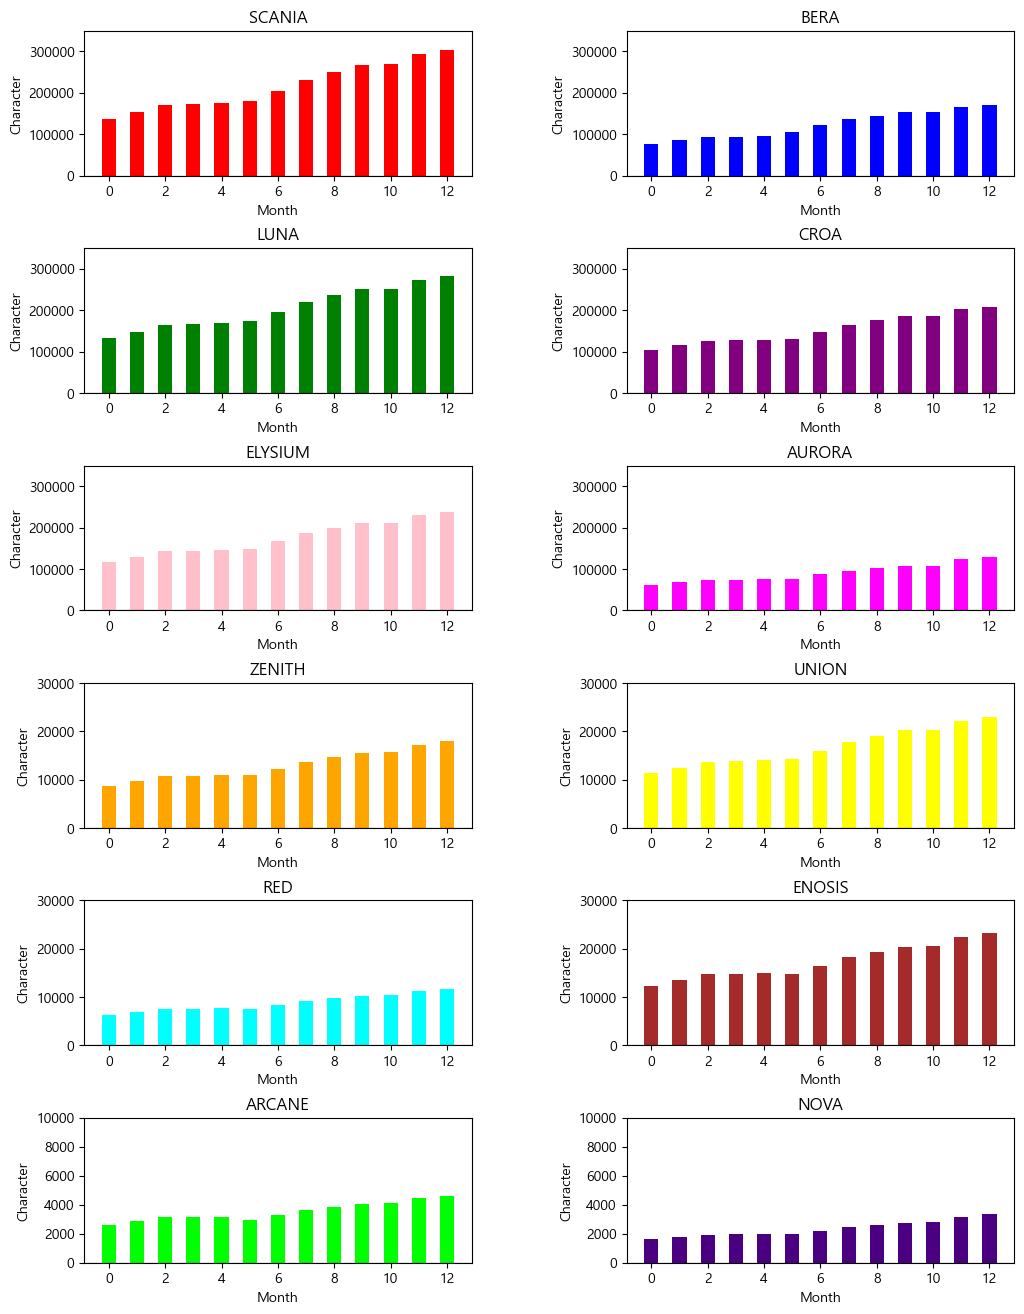

In [49]:
fig, axes = plt.subplots(6, 2, figsize=(12, 16), gridspec_kw={'wspace': 0.4})

# 스카니아
axes[0, 0].bar(SCANIA.index, SCANIA['260'], color='red', width=0.5)
axes[0, 0].set_title('SCANIA')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Character')
axes[0, 0].axhline(0, color='black', linewidth=0.8)
axes[0, 0].set_ylim(0, 350000)

# 베라
axes[0, 1].bar(BERA.index, BERA['260'], color='blue', width=0.5)
axes[0, 1].set_title('BERA')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Character')
axes[0, 1].axhline(0, color='black', linewidth=0.8)
axes[0, 1].set_ylim(0, 350000)

# 루나
axes[1, 0].bar(LUNA.index, LUNA['260'], color='green', width=0.5)
axes[1, 0].set_title('LUNA')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Character')
axes[1, 0].axhline(0, color='black', linewidth=0.8)
axes[1, 0].set_ylim(0, 350000)

# 크로아
axes[1, 1].bar(CROA.index, CROA['260'], color='purple', width=0.5)
axes[1, 1].set_title('CROA')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Character')
axes[1, 1].axhline(0, color='black', linewidth=0.8)
axes[1, 1].set_ylim(0, 350000)

# 엘리시움
axes[2, 0].bar(ELYSIUM.index, ELYSIUM['260'], color='pink', width=0.5)
axes[2, 0].set_title('ELYSIUM')
axes[2, 0].set_xlabel('Month')
axes[2, 0].set_ylabel('Character')
axes[2, 0].axhline(0, color='black', linewidth=0.8)
axes[2, 0].set_ylim(0, 350000)

# 오로라
axes[2, 1].bar(AURORA.index, AURORA['260'], color='magenta', width=0.5)
axes[2, 1].set_title('AURORA')
axes[2, 1].set_xlabel('Month')
axes[2, 1].set_ylabel('Character')
axes[2, 1].axhline(0, color='black', linewidth=0.8)
axes[2, 1].set_ylim(0, 350000)

# 제니스
axes[3, 0].bar(ZENITH.index, ZENITH['260'], color='orange', width=0.5)
axes[3, 0].set_title('ZENITH')
axes[3, 0].set_xlabel('Month')
axes[3, 0].set_ylabel('Character')
axes[3, 0].axhline(0, color='black', linewidth=0.8)
axes[3, 0].set_ylim(0, 30000)

# 유니온
axes[3, 1].bar(UNION.index, UNION['260'], color='yellow', width=0.5)
axes[3, 1].set_title('UNION')
axes[3, 1].set_xlabel('Month')
axes[3, 1].set_ylabel('Character')
axes[3, 1].axhline(0, color='black', linewidth=0.8)
axes[3, 1].set_ylim(0, 30000)

# 레드
axes[4, 0].bar(RED.index, RED['260'], color='cyan', width=0.5)
axes[4, 0].set_title('RED')
axes[4, 0].set_xlabel('Month')
axes[4, 0].set_ylabel('Character')
axes[4, 0].axhline(0, color='black', linewidth=0.8)
axes[4, 0].set_ylim(0, 30000)

# 이노시스
axes[4, 1].bar(ENOSIS.index, ENOSIS['260'], color='brown', width=0.5)
axes[4, 1].set_title('ENOSIS')
axes[4, 1].set_xlabel('Month')
axes[4, 1].set_ylabel('Character')
axes[4, 1].axhline(0, color='black', linewidth=0.8)
axes[4, 1].set_ylim(0, 30000)

# 아케인
axes[5, 0].bar(ARCANE.index, ARCANE['260'], color='lime', width=0.5)
axes[5, 0].set_title('ARCANE')
axes[5, 0].set_xlabel('Month')
axes[5, 0].set_ylabel('Character')
axes[5, 0].axhline(0, color='black', linewidth=0.8)
axes[5, 0].set_ylim(0, 10000)

# 노바
axes[5, 1].bar(NOVA.index, NOVA['260'], color='indigo', width=0.5)
axes[5, 1].set_title('NOVA')
axes[5, 1].set_xlabel('Month')
axes[5, 1].set_ylabel('Character')
axes[5, 1].axhline(0, color='black', linewidth=0.8)
axes[5, 1].set_ylim(0, 10000)

fig.subplots_adjust(hspace=0.5)
plt.show()

24년 12월 19일, 월드리프와 하이퍼 버닝 이벤트가 시작됐다.

모든 유저가 챌린저스 월드에서 육성을 하는 것은 아니며, 계정을 삭제하는 일은 흔치 않다.\
25년 1월과 25년 2월 데이터는 하이퍼 버닝의 영향으로 각 월드의 기존 유저들이 활동을 한다면 그래프가 크게 올라가야 한다.

스카니아, 루나, 엘리시움 순으로 260레벨 캐릭터가 가장 많이 집계되었다.\
이는 계정 수(이용자 수)가 가장 많다는 것은 아니지만, 가장 활발한 월드임을 보여주는 중요한 지표이다.\
특히 스카니아는 25년 기준 260레벨 이상 캐릭터의 수가 30만 개를 넘어섰다.\
반대로 아케인과 노바는 260레벨 캐릭터의 수가 1만 개를 넘지 못하는 것으로 유저의 수가 상당히 적다는 것을 알 수 있다.

아래는 월드별 25년 02월(1월 31일 집계)기준 260레벨 이상 캐릭터의 수 이다.

In [58]:
for W in World:
    print(W, " : ", globals()[W]['260'][12])

SCANIA  :  302516
BERA  :  171527
LUNA  :  283321
ZENITH  :  17947
CROA  :  208625
UNION  :  23026
ELYSIUM  :  237279
ENOSIS  :  23347
RED  :  11619
AURORA  :  128517
ARCANE  :  4623
NOVA  :  3341


# 챌린저스 월드 이용 현황

In [59]:
len(Data_25_01[Data_25_01['월드']=='챌린저스'])

55558

25년 1월(24년 12월 31일 집계) 데이터 기준 약 5만5천 개의 캐릭터가 260레벨을 달성한 것으로 집계됐다.

In [63]:
Data_25_01[(Data_25_01['월드']=='챌린저스')]['레벨'].max()

276

이 시점 기준 챌린저스 월드의 최고 레벨은 276을 달성한 캐릭터이다.

In [60]:
len(Data_25_02[Data_25_02['월드']=='챌린저스'])

106015

25년 2월(1월 31일 집계) 데이터를 기준으로 비교했을 때,\
1월 달에 사전 리프가 진행되었음에도 불구하고 약 5만개의 캐릭터가 추가로 260레벨을 달성한 것으로 집계되었으며,\
사전 리프를 고려했을 때는 더 많은 캐릭터가 추가적으로 260레벨을 달성한 것으로 보인다.

In [64]:
Data_25_02[(Data_25_02['월드']=='챌린저스')]['레벨'].max()

283

한 달이 지난 후의 챌린저스 월드의 최고 레벨은 283을 달성한 캐릭터로 상당히 빠른 성장을 보여주고 있다.

아래는 챌린저스 월드의 각 레벨별 분포현황이다.

In [69]:
CH_01 = Data_25_01[Data_25_01['월드']=='챌린저스']
CH_02 = Data_25_02[Data_25_02['월드']=='챌린저스']

In [103]:
CHALLENGERS1 = pd.DataFrame(columns=['캐릭터 수'], index=range(8))
CHALLENGERS1.index = pd.Index([260, 265, 270, 275, 280, 285, 290, 295])
CHALLENGERS2 = pd.DataFrame(columns=['캐릭터 수'], index=range(8))
CHALLENGERS2.index = pd.Index([260, 265, 270, 275, 280, 285, 290, 295])

In [105]:
for i in range(8):
    if len(CH_01[CH_01['레벨'] >= 260+(i*5)]) > 0:
        CHALLENGERS1['캐릭터 수'][260+(i*5)] = len(CH_01[(CH_01['레벨'] >= 260+(i*5)) & (CH_01['레벨'] < 265+(i*5))])

    if len(CH_02[CH_02['레벨'] >= 260+(i*5)]) > 0:
        CHALLENGERS2['캐릭터 수'][260+(i*5)] = len(CH_02[(CH_02['레벨'] >= 260+(i*5)) & (CH_02['레벨'] < 265+(i*5))])

CHALLENGERS1 = CHALLENGERS1.dropna()
CHALLENGERS2 = CHALLENGERS2.dropna()

260-264, 265-269, 270-274, 275-279, 280-284의 분포이다.

In [117]:
CHALLENGERS1

,캐릭터 수
260,50937
265,4229
270,388
275,4


In [118]:
CHALLENGERS2

,캐릭터 수
260,56834
265,28080
270,18588
275,2472
280,41


아래는 그 현황을 나타낸 그래프이다.

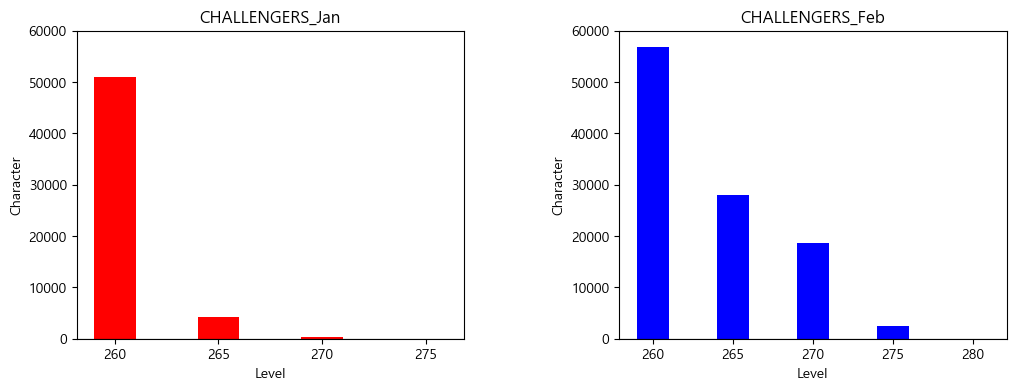

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'wspace': 0.4})

# 챌린저스 1월
axes[0].bar(CHALLENGERS1.index, CHALLENGERS1['캐릭터 수'], color='red', width=2)
axes[0].set_title('CHALLENGERS_Jan')
axes[0].set_xlabel('Level')
axes[0].set_ylabel('Character')
axes[0].axhline(0, color='black', linewidth=0.8)
axes[0].set_ylim(0, 60000)
axes[0].set_xticks(CHALLENGERS1.index)

# 챌린저스 2월
axes[1].bar(CHALLENGERS2.index, CHALLENGERS2['캐릭터 수'], color='blue', width=2)
axes[1].set_title('CHALLENGERS_Feb')
axes[1].set_xlabel('Level')
axes[1].set_ylabel('Character')
axes[1].axhline(0, color='black', linewidth=0.8)
axes[1].set_ylim(0, 60000)
axes[1].set_xticks(CHALLENGERS2.index)

fig.subplots_adjust(hspace=0.5)
plt.show()

챌린저스 월드에서 260레벨을 달성하고 각자 본 캐릭터가 존재하는(혹은 새로 정착할) 월드로 리프를 시키지 않고,\
그대로 남아서 265레벨 이상을 달성한 캐릭터의 수가 약 4만 6천 개로 집계되었다.

이는 챌린저스 월드에서 진행하는 이벤트와 더불어 챌린저스 월드에서 주어지는 혜택들이 유저에게 충분한 이점으로 작용하고 있으며,\
유저들 역시 챌린저스 월드에서 받는 혜택들로 260레벨을 달성했음에도 불구하고 이탈하지 않고 남아있는 모습을 보여준다.\
이러한 지표는 챌린저스 월드가 성공적으로 운영되고 있음을 보여준다.